## Connecting to Reddit's API

#### Downloading and installing the PRAW package and its dependencies, allowing you to interact with Reddit's API

In [3]:
pip install praw


  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for update-checker>=0.18 from https://files.pythonhosted.org/packages/0c/ba/8dd7fa5f0b1c6a8ac62f8f57f7e794160c1f86f31c6d0fb00f582372a3e4/update_checker-0.18.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/191.0 kB ? eta -:--:--
   ------------------------------ --------- 143.4/191.0 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.9 MB/s eta 0:00:00


#### Initializing a PRAW Reddit instance with client ID, client secret, and a user agent string

In [4]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="bV6KhjbL9qzNUKy0Oke3Hw",
    client_secret="AbBk1XxdlvzjvVEijs7R4OUPCIN78g",
    user_agent=user_agent
)

####  Importing the pandas library & numpy

In [5]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

#### Iterating through the submissions in the "Datascience" subreddit using PRAW (Python Reddit API Wrapper) and printing various attributes of each submission. 

In [7]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Datascience").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Weekly Entering & Transitioning - Thread 22 Apr, 2024 - 29 Apr, 2024
1ca1bqf
AutoModerator
1713758488.0
2
0.75
https://www.reddit.com/r/datascience/comments/1ca1bqf/weekly_entering_transitioning_thread_22_apr_2024/
0


#### Collects the titles of submissions in the "Datascience" subreddit without duplicates by adding them to a set named headlines

In [38]:
headlines = set()
for submission in reddit.subreddit("Datascience").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines)) #prints the number of unique headlines collected

172


#### Creates a dataframe from the set of headlines collected

In [39]:
#Create a dataframe from the scrapped data 
datascience_df = pd.DataFrame(headlines)
datascience_df.head()

,0
0,Asking for a promotion too soon?
1,"Learning OOP, stick with Python or learn using..."
2,Any marketing graduates who have switched to D...
3,Preparation for a Final Round Interview for a ...
4,Resources to improve code design and software ...


In [40]:
datascience_df.columns = ['text'] #renamed the column
datascience_df

,text
0,Asking for a promotion too soon?
1,"Learning OOP, stick with Python or learn using..."
2,Any marketing graduates who have switched to D...
3,Preparation for a Final Round Interview for a ...
4,Resources to improve code design and software ...
...,...
167,Am I a coding Imposter?
168,"Online PhDs, unranked universities, career"
169,"If you mainly want to do Machine Learning, don..."
170,[Need advice]I Want to Leave MAANG a Month Aft...


#### Returns the column names of the dataframe datascience_df

In [41]:
datascience_df.columns

Index(['text'], dtype='object')

In [42]:
datascience_df.columns = ['Titles'] #Rename the column name to 'Titles'

In [43]:
datascience_df.head() #displays the first 5 rows of the DataFrame

,Titles
0,Asking for a promotion too soon?
1,"Learning OOP, stick with Python or learn using..."
2,Any marketing graduates who have switched to D...
3,Preparation for a Final Round Interview for a ...
4,Resources to improve code design and software ...


#### Checks for duplicate titles in the DataFrame 'datascience_df'

In [44]:
datascience_df.Titles.duplicated().sum() 

0

#### Created a function cleanTxt() to remove various elements like mentions, hashtags, retweet tags, hyperlinks, and colons from the text

In [45]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
datascience_df["Titles"]= datascience_df["Titles"].apply(cleanTxt)

#Show the clean text
datascience_df.head()

,Titles
0,Asking for a promotion too soon?
1,"Learning OOP, stick with Python or learn using..."
2,Any marketing graduates who have switched to D...
3,Preparation for a Final Round Interview for a ...
4,Resources to improve code design and software ...


#### Defined a function remove_emoji() that utilizes a regular expression pattern to match emojis and Unicode characters and replace them with an empty string

In [46]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
datascience_df["Titles"]= datascience_df["Titles"].apply(remove_emoji)

#Show the clean text
datascience_df.head()

,Titles
0,Asking for a promotion too soon?
1,"Learning OOP, stick with Python or learn using..."
2,Any marketing graduates who have switched to D...
3,Preparation for a Final Round Interview for a ...
4,Resources to improve code design and software ...


#### Installing the TextBlob library using pip

In [47]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   -------------- ------------------------- 225.3/626.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#### Calculates the subjectivity and polarity of the text in the "text" column of DataFrame datascience_df using TextBlob and add the results as new columns

In [49]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
datascience_df['Subjectivity'] = datascience_df['Titles'].apply(getSubjectivity)
datascience_df['Polarity'] = datascience_df['Titles'].apply(getPolarity)

#Now display data
datascience_df.head()

,Titles,Subjectivity,Polarity
0,Asking for a promotion too soon?,0.0,0.0
1,"Learning OOP, stick with Python or learn using...",0.0,0.0
2,Any marketing graduates who have switched to D...,0.0,0.0
3,Preparation for a Final Round Interview for a ...,0.7,-0.1
4,Resources to improve code design and software ...,0.0,0.0


#### Categorize the polarity scores into different insight categories: "Negative", "Neutral", and "Positive"

In [50]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
datascience_df["Insight"] = datascience_df["Polarity"].apply(getInsight)

datascience_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Asking for a promotion too soon?,0.000000,0.000000,Neutral
1,"Learning OOP, stick with Python or learn using...",0.000000,0.000000,Neutral
2,Any marketing graduates who have switched to D...,0.000000,0.000000,Neutral
3,Preparation for a Final Round Interview for a ...,0.700000,-0.100000,Negative
4,Resources to improve code design and software ...,0.000000,0.000000,Neutral
5,"Sampling from a large, not independent dataset",0.276786,0.107143,Positive
6,Distraction caused by the Ai Hype,0.000000,0.000000,Neutral
7,Predictive maintenance,0.000000,0.000000,Neutral
8,Self serve dashboard adoption,0.000000,0.000000,Neutral
9,Using a data warehouse as a data source for ml...,0.000000,0.000000,Neutral


#### Importing additional libraries for visualization: seaborn, wordcloud, and matplotlib

In [51]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Plotting the count of sentiment categories ("Negative", "Neutral", and "Positive") using a bar plot

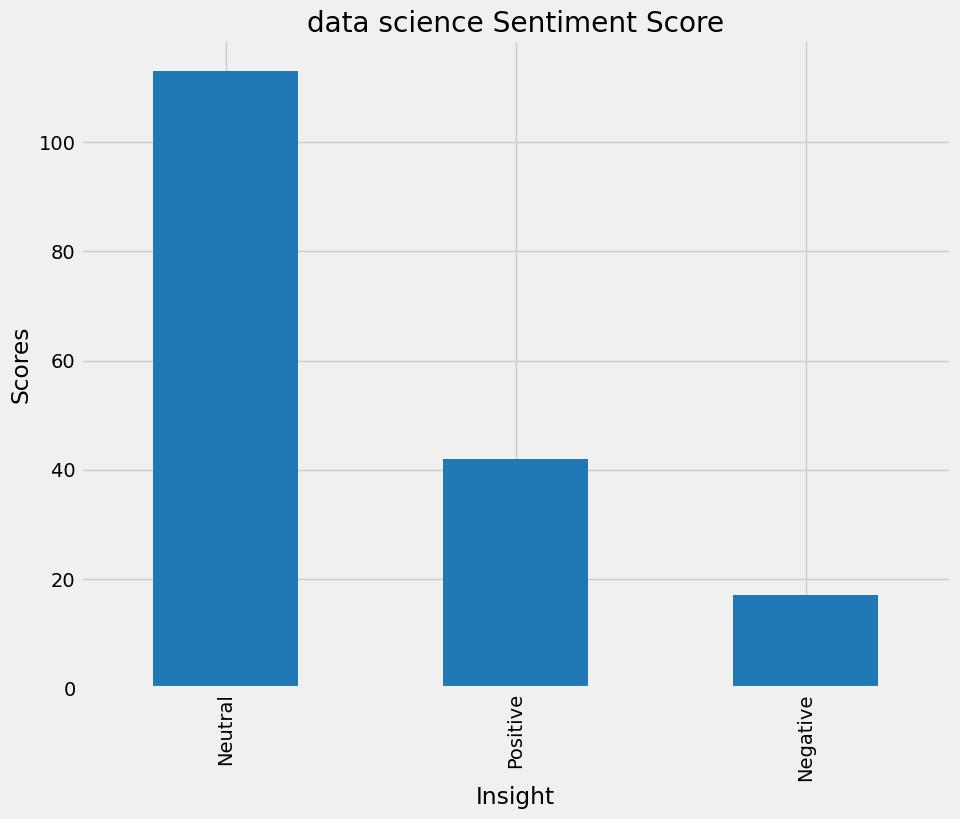

In [53]:
#Plot the values count of sentiment
plt.title("data science Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
datascience_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

### Word cloud visualization based on the text data from the 'Titles' column of the DataFrame 'datascience_df'

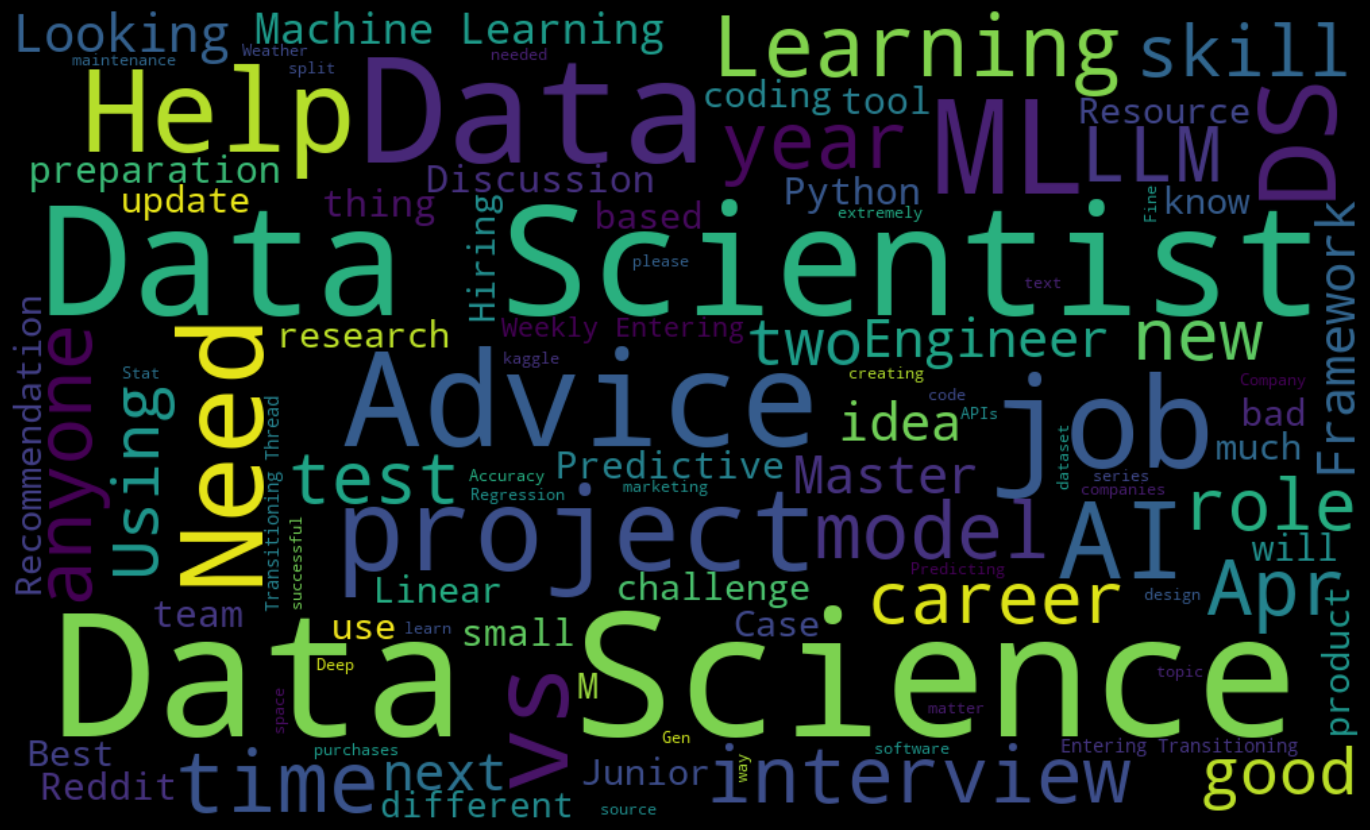

In [54]:
text = ' '.join( [twts for twts in datascience_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");